In [1]:
import numpy as np

In [2]:
from utils_graph_generation import load_graph, get_paths
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution

# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [3]:
# Dado un nombre de grafo, imprime las gráficas relativas a las distribuciones de grados de los nodos
def calc_plot_degree_distributions(name_graph, graphs_folder, plots_folder, G=None):
    if G is None:
        G = load_graph(name_graph, graphs_folder)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float)/float(G.number_of_nodes()))

    plot_degree_distribution([points], name_graph, plots_folder)

    arr_deg_prob = plot_degree_probability_distribution([points], G.number_of_nodes(), name_graph, plots_folder)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder)


Cargado el grafo de la hora 437038, numero de nodos: 5759, numero de aristas: 74354


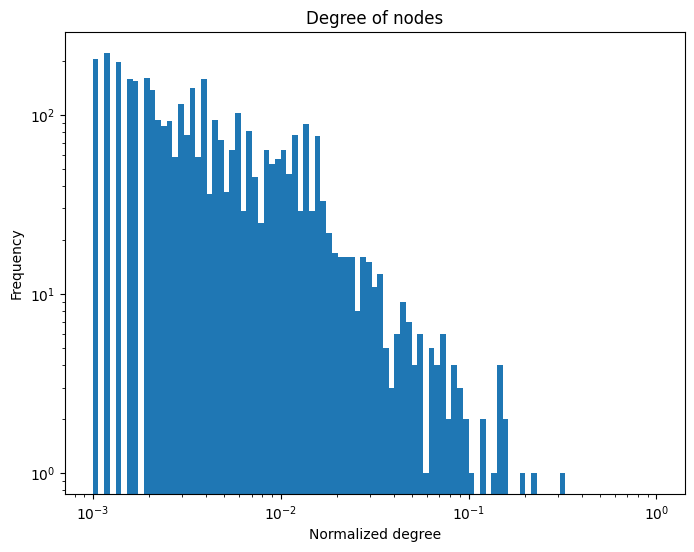

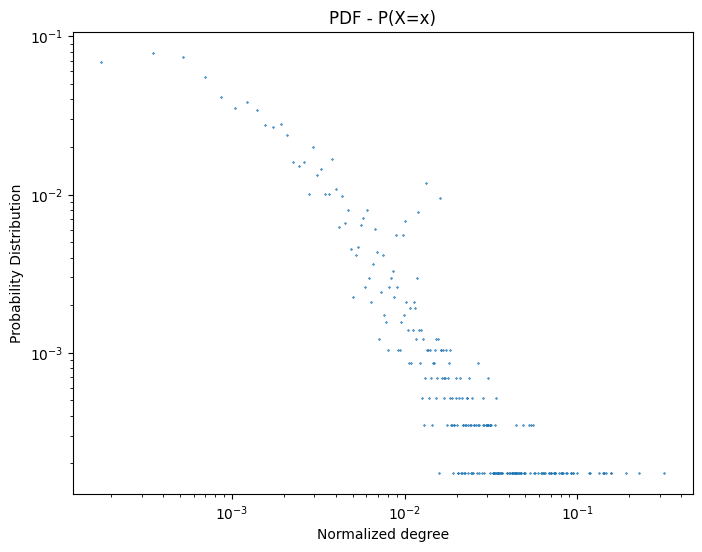

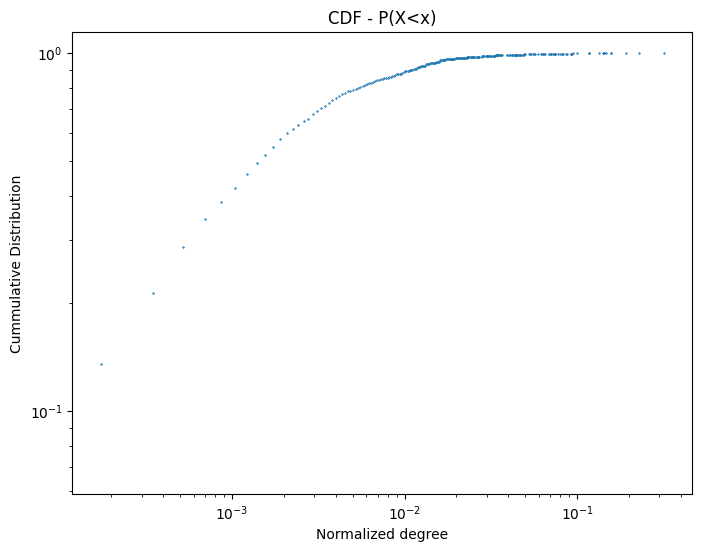

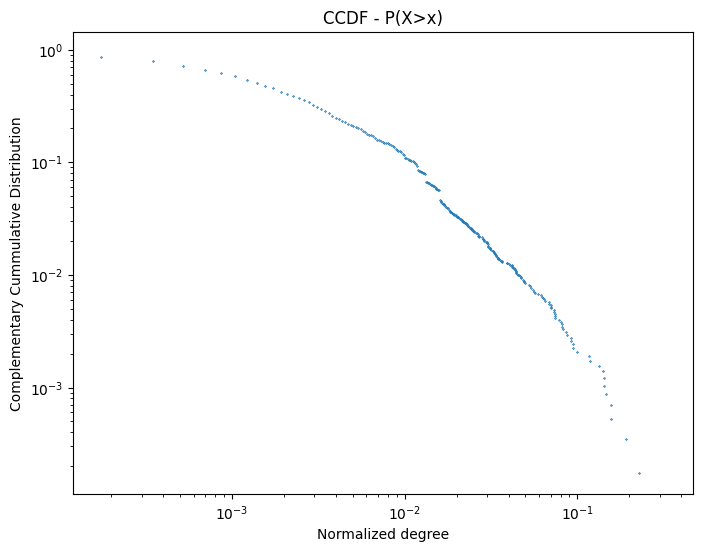

In [4]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

MANIFESTACION = "9n"
hora = "437038"


graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distributions(hora, graphs_folder, plots_folder)


In [5]:
from utils_graph_metrics import tresh_normalization

In [6]:
def calc_plot_degree_distributions_tres(name_graph, graphs_folder, plots_folder, G=None, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250]):
    
    # Cargamos el grafo inicial
    if G is None:
        G = load_graph(name_graph, graphs_folder)
    arr_points = []
    for kt in arr_kt_plot:
        F = tresh_normalization(G, kt)
        points_kt = np.sort(np.array(list(dict(F.degree()).values())).astype(float)/float(G.number_of_nodes()))
        arr_points.append(points_kt)
    
    plot_degree_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot, alpha=0.45)

    arr_deg_prob = plot_degree_probability_distribution(arr_points, G.number_of_nodes(), name_graph, plots_folder, arr_kt_plot=arr_kt_plot)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

Cargado el grafo de la hora 437038, numero de nodos: 5759, numero de aristas: 74354


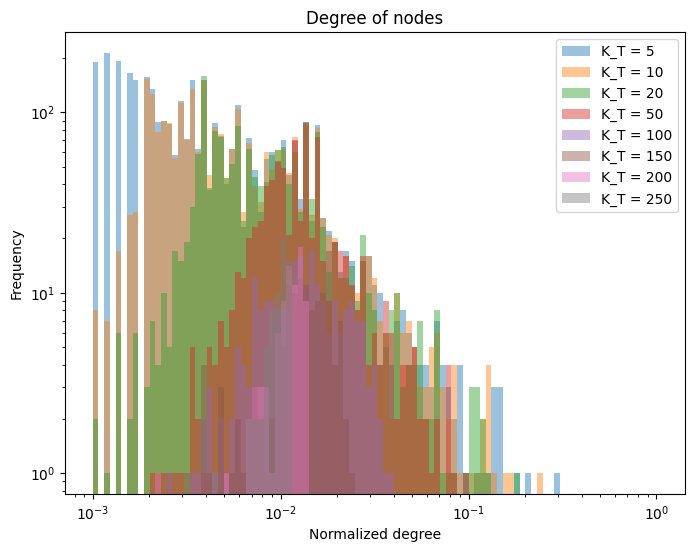

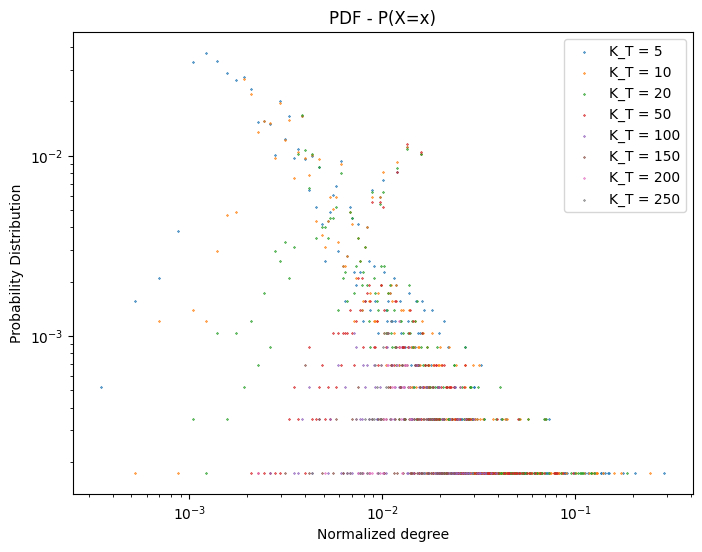

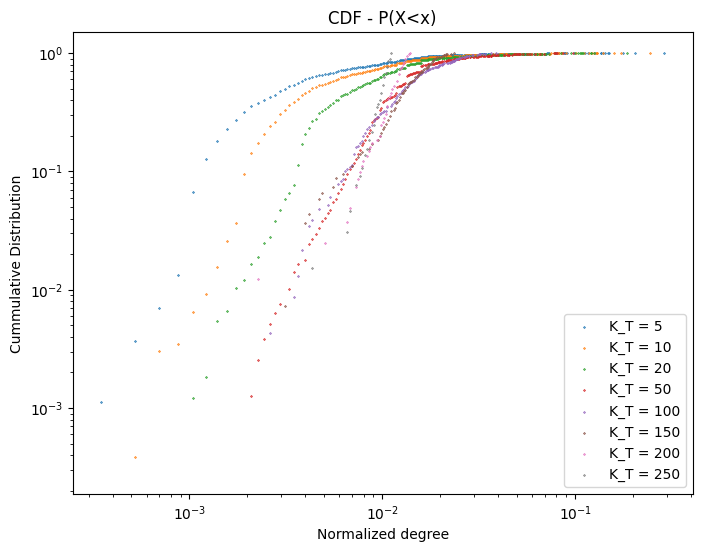

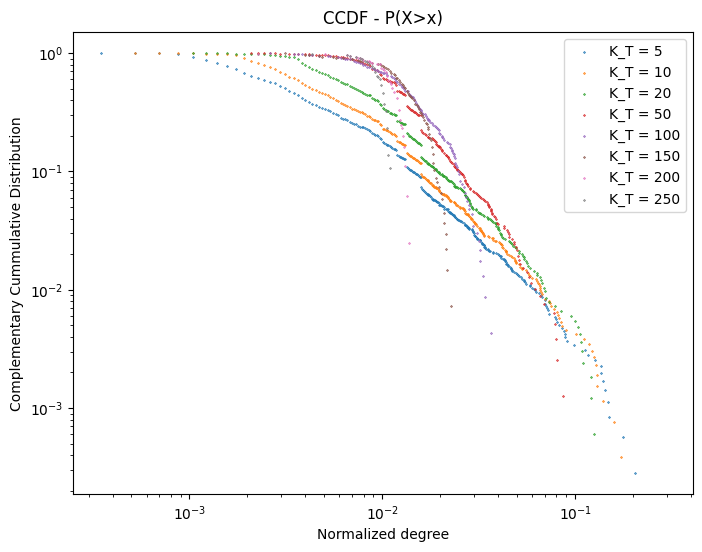

In [8]:
graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, arr_kt_plot=[10,20,30,40,50,60,70,80])